In [125]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

class Experiment3:
    def __init__(self):
        pass
    
    def fft_1d(self, x):
        """
        Recursive FFT function
        """
        n = len(x)

        if not (n & (n - 1)) == 0:
            next_pow_2 = 1 << (n - 1).bit_length()
            x = np.concatenate([x, np.zeros(next_pow_2 - n)])
            n = next_pow_2

        if n <= 1:
            return x
        
        x_even = self.fft_1d(x[::2])
        x_odd = self.fft_1d(x[1::2])

        muls = np.exp(-2j * np.pi * np.arange(n//2) / n) * x_odd

        ans = np.concatenate([
            x_even + muls,
            x_even - muls
        ])

        return ans
    
    def ifft_1d(self, x):
        """
        IFFT function
        """
        n = len(x)
        x_bar = [y.conjugate() for y in x]
        fft = self.fft_1d(x_bar)
        ifft = [y.conjugate() / n for y in fft]
        return ifft

    def fft_2d(self, image):
        """
        FFT function for Image
        1. FFT for rows is calculated
        2. FFT of the previous step on columns is calculated
        """
        rows, cols = image.shape
        
        fft_rows = []
        for r in range(rows):
            fft_rows.append(self.fft_1d(image[r]))
        
        fft_rows = np.array(fft_rows)
        
        fft_cols = []
        for c in range(cols):
            fft_cols.append(self.fft_1d(fft_rows[:, c]))
        
        res = np.array(fft_cols)
        
        return res
    
    def ifft_2d(self, fft):
        """
        IFFT function for Image
        1. IFFT for rows is calculated
        2. IFFT of the previous step on columns is calculated
        """
        rows, cols = fft.shape

        ifft_rows = []
        for r in range(rows):
            ifft_rows.append(self.ifft_1d(fft[r]))
        
        ifft_rows = np.array(ifft_rows)
        
        ifft_cols = []
        for c in range(cols):
            ifft_cols.append(self.ifft_1d(ifft_rows[:, c]))
        
        res = np.array(ifft_cols)
        
        return res
    
    def visualize_spectrum(self, fft, shift=True, save=False):
        if shift:
            fft = self.fftshift(fft)

        mag = np.abs(fft)
        phase = np.angle(fft)

        plt.figure()
        if not(save):
            plt.figure(figsize=(10, 5))

        plt.subplot(1, 3, 1)
        plt.title('Magnitude Spectrum (log)')
        plt.imshow(np.log(mag + 1), cmap='magma')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.title('Phase Spectrum')
        plt.imshow(phase, cmap='magma')
        plt.axis('off')
        
        if save:
            plt.savefig(save[:save.find(".")] + "_q1" + save[save.find("."):])
        else:
            plt.show()
        
        return

    def load_image(self, filepath):
        self.filepath = filepath
        img = Image.open(filepath).convert('L')
        self.img = np.array(img)

    def fftshift(self, x):
        """
        Shift zero-frequency component to the center of the spectrum
        """
        rows, cols = x.shape
        row_mid = rows // 2
        col_mid = cols // 2
        
        shifted = np.zeros_like(x, dtype=x.dtype)
        
        shifted[:row_mid, :col_mid] = x[row_mid:, col_mid:]
        shifted[row_mid:, col_mid:] = x[:row_mid, :col_mid]
        shifted[:row_mid, col_mid:] = x[row_mid:, :col_mid]
        shifted[row_mid:, :col_mid] = x[:row_mid, col_mid:]
        
        return shifted

    def q1(self, filepath, shift=True, save=False):
        self.load_image(filepath)

        fft = self.fft_2d(self.img)
        
        self.visualize_spectrum(fft, shift=shift, save=save)

        return
    
    def multiply_func_given(x, y):
        return (-1) ** (x + y)
    
    def multiply_image(self, image, multiply_func = multiply_func_given):
        rows, cols = image.shape

        mul_img = image.copy().astype(int)

        for r in range(rows):
            for c in range(cols):
                mul_img[r, c] *= multiply_func(r, c)
        
        return mul_img

    def q2(self, filepath, multiply_func = multiply_func_given, save=False):
        self.load_image(filepath)

        mul_img = self.multiply_image(self.img, multiply_func)
        fft = self.fft_2d(mul_img)
        fft_bar = np.conjugate(fft)
        ifft = self.ifft_2d(fft_bar)
        ifft = np.real(ifft)
        new_img = self.multiply_image(ifft, multiply_func)

        plt.figure()
        if not(save):
            plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 3, 1)
        plt.title('Original Image')
        plt.imshow(self.img, cmap='gray')
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.title('Multiplied Image')
        plt.imshow(mul_img, cmap='gray')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title('New Image')
        plt.imshow(new_img, cmap='gray')
        plt.axis('off')
        
        if save:
            plt.savefig(save[:save.find(".")] + "_q2" + save[save.find("."):])
        else:
            plt.show()

    def save_outputs(self, filepath, savepath):
        self.q1(filepath, save=savepath)
        self.q2(filepath, save=savepath)
        return

In [126]:
exp3 = Experiment3()

filepath = "images/lena_gray_512.jpg"

<Figure size 640x480 with 0 Axes>

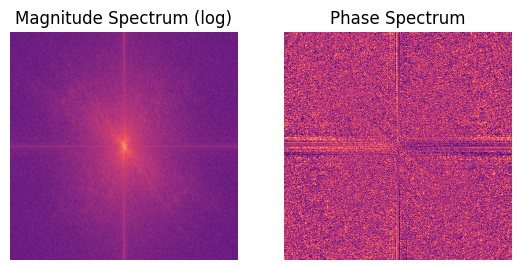

In [127]:
exp3.q1(filepath)

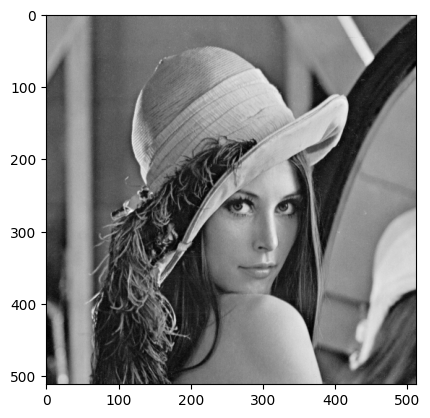

In [128]:
plt.imshow(np.real(exp3.ifft_2d(exp3.fft_2d(exp3.img))), cmap="gray")

<Figure size 640x480 with 0 Axes>

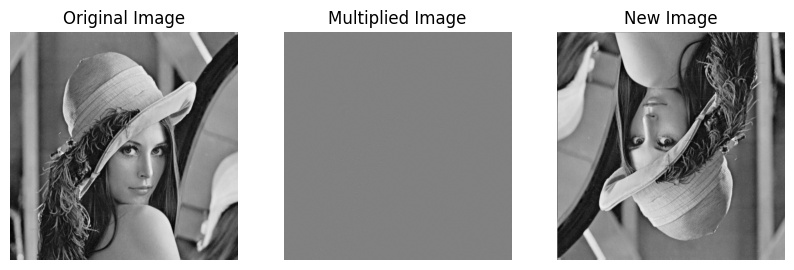

In [129]:
exp3.q2(filepath)

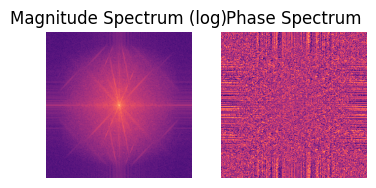

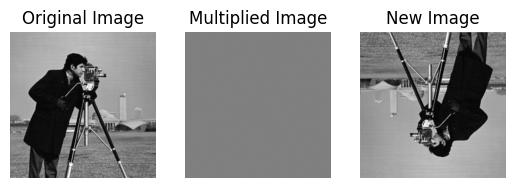

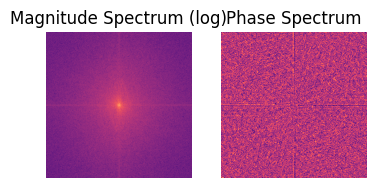

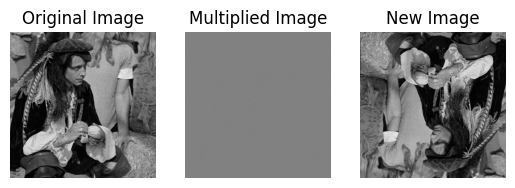

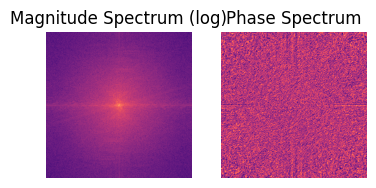

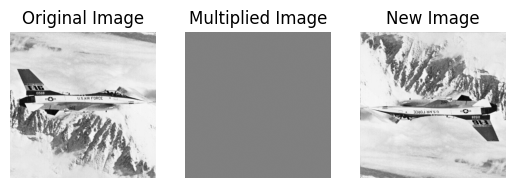

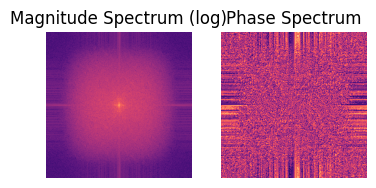

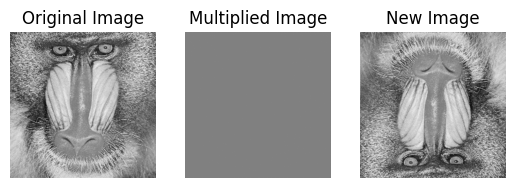

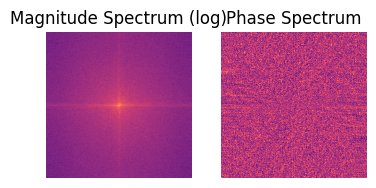

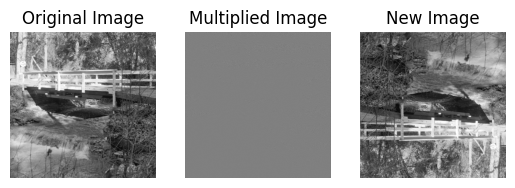

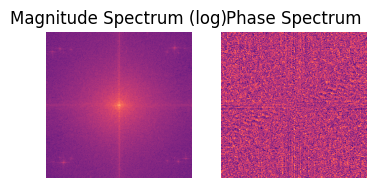

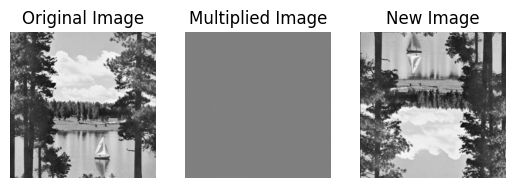

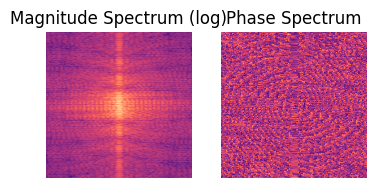

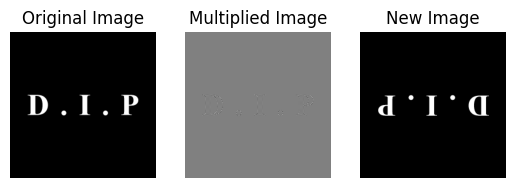

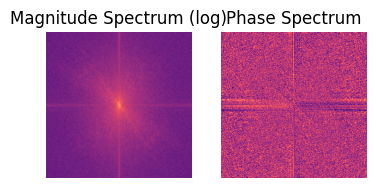

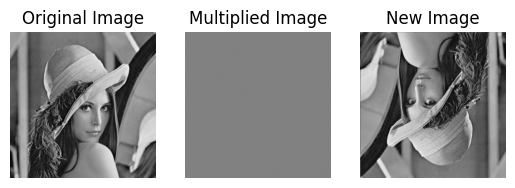

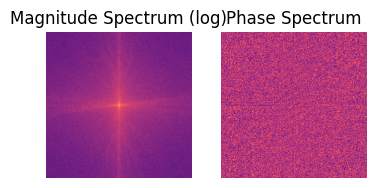

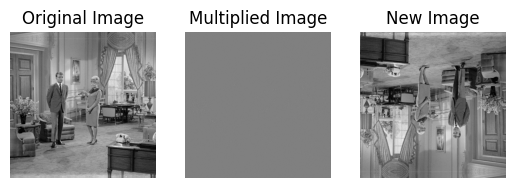

In [130]:
import os

for pth in os.listdir("images/"):
    if pth[pth.find("."):] in [".bmp", ".jpg", ".tiff"]:
        exp = Experiment3()
        exp.save_outputs("images/" + pth, "outputs/" + pth)